In [ ]:
!pip -q install plotly --upgrade

In [ ]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
base_completed = pd.read_csv("/content/sample_data/train.csv", sep=',')
base_completed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
columns_selected = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [ ]:
base = pd.read_csv("/content/sample_data/train.csv", sep=',', usecols=columns_selected)

In [ ]:
base

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
base.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [ ]:
classificacao = base.columns[0]
np.unique(base[classificacao], return_counts=True)

(array([0, 1]), array([549, 342]))

<Axes: xlabel='Survived', ylabel='count'>

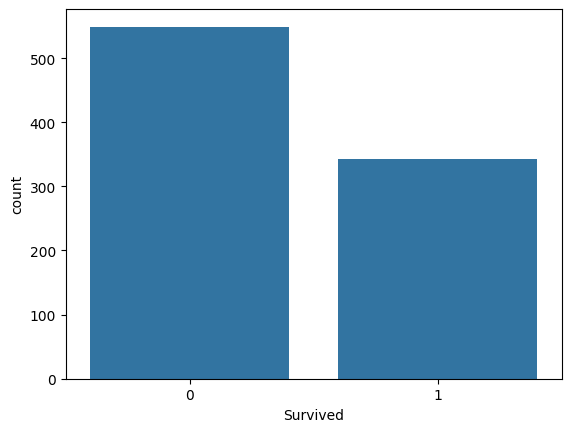

In [ ]:
sns.countplot(x = base[classificacao])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Tratamento manual
base["Sex_encoded"] = np.where(base["Sex"] == "male", 0, 1)
base["Embarked_encoded"] = np.where(base["Embarked"] == "S", 0,
                                    np.where(base["Embarked"]=="C",1,
                                             np.where(base["Embarked"] == "Q",2,3)))

#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
'''
cols_label_encode = ['Sex', 'Embarked']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)
base[cols_label_encode]
'''

base.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,0
5,0,3,male,NaN,0,0,8.4583,NaN,Q,0,2
6,0,1,male,54.0,0,0,51.8625,E46,S,0,0
7,0,3,male,2.0,3,1,21.0750,NaN,S,0,0
8,1,3,female,27.0,0,2,11.1333,NaN,S,1,0
9,1,2,female,14.0,1,0,30.0708,NaN,C,1,1


In [ ]:
# Limpando linhas com NaN nas colunas selecionadas da base de dados
coluns_selected_and_encoded = ['Survived', 'Pclass', "Sex", 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', "Embarked" ,'Embarked_encoded']


base_encoded = base[coluns_selected_and_encoded].dropna(axis=0, how="any")
base_encoded

,Survived,Pclass,Sex,Sex_encoded,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_encoded
1,1,1,female,1,38.0,1,0,71.2833,C85,C,1
3,1,1,female,1,35.0,1,0,53.1000,C123,S,0
6,0,1,male,0,54.0,0,0,51.8625,E46,S,0
10,1,3,female,1,4.0,1,1,16.7000,G6,S,0
11,1,1,female,1,58.0,0,0,26.5500,C103,S,0
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,1,47.0,1,1,52.5542,D35,S,0
872,0,1,male,0,33.0,0,0,5.0000,B51 B53 B55,S,0
879,1,1,female,1,56.0,0,1,83.1583,C50,C,1
887,1,1,female,1,19.0,0,0,30.0000,B42,S,0


In [ ]:
print(f"Original: {len(np.unique(base['Age']))} - Tratada: {len(np.unique(base_encoded['Age']))}")


Original: 89 - Tratada: 63


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
X_prev = base_encoded.iloc[:, 1:]
y_classe = base_encoded.iloc[:, 0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_prev

,Pclass,Sex,Sex_encoded,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_encoded
1,1,female,1,38.0,1,0,71.2833,C85,C,1
3,1,female,1,35.0,1,0,53.1000,C123,S,0
6,1,male,0,54.0,0,0,51.8625,E46,S,0
10,3,female,1,4.0,1,1,16.7000,G6,S,0
11,1,female,1,58.0,0,0,26.5500,C103,S,0
...,...,...,...,...,...,...,...,...,...,...
871,1,female,1,47.0,1,1,52.5542,D35,S,0
872,1,male,0,33.0,0,0,5.0000,B51 B53 B55,S,0
879,1,female,1,56.0,0,1,83.1583,C50,C,1
887,1,female,1,19.0,0,0,30.0000,B42,S,0


In [ ]:
y_classe

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


In [ ]:
y_classe.shape

(183,)

In [ ]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [ ]:
X_teste.shape

(37, 10)

In [ ]:
X_teste

,Pclass,Sex,Sex_encoded,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_encoded
118,1,male,0,24.00,0,1,247.5208,B58 B60,C,1
251,3,female,1,29.00,1,1,10.4625,G6,S,0
742,1,female,1,21.00,2,2,262.3750,B57 B59 B63 B66,C,1
544,1,male,0,50.00,1,0,106.4250,C86,C,1
712,1,male,0,48.00,1,0,52.0000,C126,S,0
96,1,male,0,71.00,0,0,34.6542,A5,C,1
139,1,male,0,24.00,0,0,79.2000,B86,C,1
337,1,female,1,41.00,0,0,134.5000,E40,C,1
577,1,female,1,39.00,1,0,55.9000,E44,S,0
492,1,male,0,55.00,0,0,30.5000,C30,S,0


In [ ]:
y_treino

,Survived
331,0
336,0
193,1
75,0
248,1
...,...
520,1
92,0
460,1
872,0


In [ ]:
y_teste

,Survived
118,0
251,0
742,1
544,0
712,1
96,0
139,0
337,1
577,1
492,0


In [ ]:
import pickle

In [ ]:
with open('/content/sample_data/titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)